<a href="https://colab.research.google.com/github/kakyungkim/aiffel/blob/main/time_series_mini_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 10-6. ÌîÑÎ°úÏ†ùÌä∏ : Finance Time Series Îç∞Ïù¥ÌÑ∞ ÌôúÏö©ÌïòÍ∏∞

**ÌîÑÎ°úÏ†ùÌä∏ ÏöîÏïΩ**

--------------------------------
1. ÌîÑÎ°úÏ†ùÌä∏ : Data Labeling
2. ÌîÑÎ°úÏ†ùÌä∏ : Feature Engineering
3. ÌîÑÎ°úÏ†ùÌä∏ : Model Training
--------------------------------

Ïù¥Î≤à ÎÖ∏ÎìúÏóêÏÑú ÌîÑÎ°úÏ†ùÌä∏Îäî Ï¥ù 3Í∞ÄÏßÄÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ÏûàÏäµÎãàÎã§. Data Labeling Î∞©Î≤ïÍ≥º Feature Engineering Î∞©Î≤ïÏóê ÎåÄÌï¥ ÏÉùÍ∞ÅÌï¥Î≥¥Î©∞ model trainingÏùÑ ÌÜµÌï¥ ÏÑ±Îä•ÏùÑ Í∞úÏÑ†ÏãúÏºúÎ¥ÖÏãúÎã§.

- ÌîÑÎ°úÏ†ùÌä∏ 1, 2Î•º Ï†ïÏÉÅÏ†ÅÏù∏ ÌùêÎ¶ÑÎåÄÎ°ú ÏßÑÌñâÌïòÍ∏∞
- ÌîÑÎ°úÏ†ùÌä∏ 3ÏóêÏÑú Îã§ÏñëÌïú Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∏∞Ï°¥Ïùò Í≤∞Í≥ºÏôÄ ÎπÑÍµê Î∂ÑÏÑù ÏãúÎèÑÌïòÍ∏∞
- Îã§ÏñëÌïú Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏÑ±Îä•Ìñ•ÏÉÅÏùÑ ÏãúÎèÑÌïòÍ∏∞
ÏïûÏóêÏÑú ÌñàÎçò ÎÇ¥Ïö©ÏùÑ Í∏∞ÏñµÌïòÎ©¥ÏÑú ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Î¥ÖÏãúÎã§.

### 1. ÌîÑÎ°úÏ†ùÌä∏ : Data Labeling
ÏúÑÏóêÏÑú Î∞∞Ïö¥ Data Labeling 4Í∞ÄÏßÄÎ•º ÏßÅÏ†ë Ï†ÅÏö©Ìï¥Î¥ÖÏãúÎã§.

‚ë† Price Change Direction Ï†ÅÏö©ÌïòÍ∏∞<br>
‚ë° Using Moving Average Ï†ÅÏö©ÌïòÍ∏∞<br>
‚ë¢ Local Min-Max Ï†ÅÏö©ÌïòÍ∏∞<br>
‚ë£ Trend Scanning Ï†ÅÏö©ÌïòÍ∏∞

--------------------------------
ÏïûÏóêÏÑú ÏßÑÌñâÌïú Data Labeling Î∞©Î≤ïÏùÄ 4Í∞ÄÏßÄÍ∞Ä ÏûàÏóàÏäµÎãàÎã§.

Î®ºÏ†Ä ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∞è Ìå®ÌÇ§ÏßÄÎ•º ÌôïÏù∏ ÌõÑ Ïã§ÌñâÌï©ÎãàÎã§. Îã§ÏùåÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÄÏû•Îêú Í≤ΩÎ°úÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò® Îí§ ÌïÑÏöîÌïú Î∂ÄÎ∂ÑÏùÑ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ ÏãúÍ∞ÅÌôîÎ•º ÏßÑÌñâÌï©ÎãàÎã§.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú
# # DATA_PATH = '/aiffel/aiffel/fnguide/data/'
# DATA_PATH = '/aiffel/aiffel/08_time_series/fnguide/'
DATA_PATH = '/content/gdrive/MyDrive/aiffel/08_time_series/fnguide/'

Mounted at /content/gdrive


<Axes: xlabel='time'>

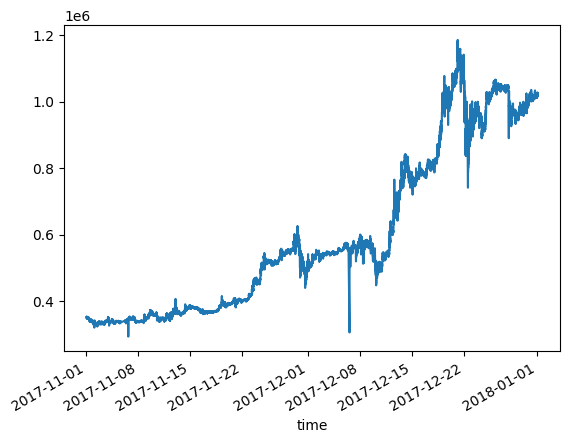

In [2]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
modify_data = pd.read_csv(os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv'), index_col=0, parse_dates=True)

# Î∂àÎü¨Ïò® Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôîÌïòÍ∏∞
modify_data.loc['2017-11-01':'2017-12-31','close'].plot()

#### ‚ë† Price Change Direction Ï†ÅÏö©ÌïòÍ∏∞
ÏïÑÎûòÏùò ÏàòÏãùÏùÑ Ï†ÅÏö©ÌïòÏó¨ momentum_signalÏùÑ ÎßåÎì§Ïñ¥Î¥ÖÏãúÎã§. Í∑∏Î¶¨Í≥† Í∏∞Ï°¥Ïùò Îç∞Ïù¥ÌÑ∞(modify_data)ÏôÄ ÏàòÏãùÏù¥ Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞(momentum_signal)Î•º ÏãúÍ∞ÅÌôîÌïòÏó¨ Ïñ¥Îñ§ Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÎπÑÍµêÌï¥Î¥ÖÏãúÎã§.
$$Label\quad i(t)=\left\{\begin{matrix}
1,if \quad price_t - price_{t-n}>0 \\
0, if \quad else \quad\quad\quad\quad\quad\quad
\end{matrix}\right.$$

Î®ºÏ†Ä windowÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§. Î≥¥ÌÜµ windowÎäî ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ïù¥Ï†Ñ ÏãúÏ†êÍ≥º ÌòÑÏû¨ ÏãúÏ†êÍ∞ÑÏùò Í∞ÑÍ≤©ÏùÑ Íµ¨Í∞ÑÎ≥ÑÎ°ú ÏûòÎùºÏÑú ÏÇ¨Ïö©ÌïòÍ≥§ Ìï©ÎãàÎã§. Ïù¥Î†áÍ≤å ÏÇ¨Ïö©ÌïòÎäî Ïù¥Ïú†Îäî Ï†ïÌôïÌïú ÏòàÏ∏°ÏùÑ Îã¨ÏÑ±ÌïòÍ∏∞ ÏúÑÌï¥ Ïö∞Î¶¨Í∞Ä Í∞ÄÏßÄÍ≥† ÏûàÎäî Ï†ïÎ≥¥Î•º Í≥ºÍ±∞Î°úÎ∂ÄÌÑ∞ Ï£ºÏñ¥ÏßÑ ÏãúÏ†êÏóêÏÑú Í∞ÄÎä•Ìïú ÏïàÏ†ÑÌïòÍ≤å Î≥¥Ï°¥Îêú Ï†ïÎ≥¥Î•º Î™®Îç∏Ïóê Ï†úÍ≥µÌïòÍ∏∞ ÏúÑÌï¥ WindowÎ°ú Îã§Ïãú Íµ¨ÏÑ±Ìïú Îã§Ïùå Î™®Îç∏Ïóê inputÏúºÎ°ú Ï£ºÏûÖÌïòÎäî Í≤ÉÏûÖÎãàÎã§. windowÎäî Î≥¥ÌÜµ time series data Ïô∏ÏóêÎèÑ ÎßéÏù¥ ÏÇ¨Ïö©ÌïòÎäî Í∏∞Î≤ïÏûÖÎãàÎã§.(ex. Ï†ïÎ†¨ ÏïåÍ≥†Î¶¨Ï¶ò, CNNÏùò sliding Îì±...)
![image.png](attachment:image.png)
[https://docs.wavefront.com/query_language_windows_trends.html]

In [3]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# window ÏßÄÏ†ï
# window = #[[YOUR CODE]] # ÏïûÏÑú ÏÇ¨Ïö©Ìïú windowÏùò Í∞íÏùÄ 10ÏûÖÎãàÎã§.
window = 10

# momentum_signal ÎßåÎì§Í∏∞
# momentum_signal = np.sign(np.sign('[[YOUR CODE]]') + 1) # modify_data['close'].shift(window)ÌôúÏö©
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].shift(window)) + 1)

# s_momentum_signal ÎßåÎì§Í∏∞
# s_momentum_signal = #[[YOUR CODE]] # Îç∞Ïù¥ÌÑ∞ ÌôúÏö©ÏùÑ ÏúÑÌï¥ pd.SeriesÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index)

Í∏∞Ï°¥Ïùò Îç∞Ïù¥ÌÑ∞(modify_data)ÏóêÏÑú ÌïÑÏöîÌïú close(Ï¢ÖÍ∞Ä)Î•º Í∞ÄÏ†∏Ïò§Í≥† ÏàòÏãùÏù¥ Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞(s_momentum_signal)Ïùò Ï¢ÖÍ∞ÄÏôÄ ÏñºÎßàÎÇò Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÌôòÌïòÍ≥† ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.

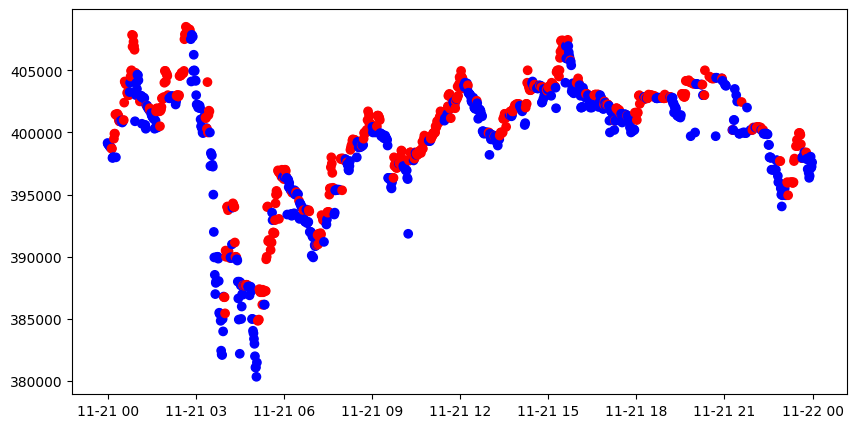

In [4]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
# sub_data = #[[YOUR CODE]] # locÎ•º ÌôúÏö©ÌïòÏó¨ 2017-11-21Î∂ÄÌÑ∞ close(Ï¢ÖÍ∞Ä)ÍπåÏßÄ Í∞ÄÏ†∏Ïò§Í∏∞
sub_data = modify_data.loc['2017-11-21', 'close']

# ÏàòÏãù Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
# c_sig = #[[YOUR CODE]] # locÎ•º ÌôúÏö©ÌïòÏó¨ 2017-11-21Ïùò ÏãúÍ∞ÑÎåÄÎ≥Ñ Í∞íÏùÑ Í∞ÄÏ†∏Ïò§Í∏∞
c_sig = s_momentum_signal.loc['2017-11-21']

# Îëê Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÍµêÎ•º ÏúÑÌïú ÏÉâÏÉÅ Î∞îÍæ∏Í∏∞
# c_sig['color'] = #[[YOUR CODE]] # np.where ÏÇ¨Ïö©
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

# ÏãúÍ∞ÅÌôîÌïòÍ∏∞
#[[YOUR CODE]]
plt.figure(figsize=(10,5))
plt.scatter(sub_data.index, sub_data, c=c_sig['color'])

#### ‚ë° Using Moving Average Ï†ÅÏö©ÌïòÍ∏∞
ÏïûÏÑú ÏÇ¨Ïö©ÌñàÎçò Ïù¥ÎèôÌèâÍ∑†ÏÑ†ÏùÑ Ïù¥Ïö©Ìïú Î∞©ÏãùÏùÑ Ï†ÅÏö©Ìï¥Î¥ÖÏãúÎã§. ÏàòÏãùÏùÄ ÏïÑÎûòÍ≥º Í∞ôÏäµÎãàÎã§.
$$Label\quad i(t)=\left\{\begin{matrix}
1,if \quad price_t>MA(t ... t-n) \\
0, if \quad else \quad\quad\quad\quad\quad\quad\quad
\end{matrix}\right.$$

In [5]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# momentum_signal
# momentum_signal = np.sign(np.sign('[[YOUR CODE]]') + 1) # modify_data['close'].rolling(window).mean() ÌôúÏö©
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].rolling(window).mean()) + 1)

# s_momentum_signal
# s_momentum_signal = #[[YOUR CODE]] # pd.SeriesÎ°ú Î≥ÄÌôò
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index)

ÏïûÏÑú "‚ë† Price Change Direction Ï†ÅÏö©ÌïòÍ∏∞"ÏóêÏÑú ÏßÑÌñâÌñàÎçò Í≤ÉÏ≤òÎüº ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Using Moving Average ÏàòÏãùÏùÑ Ï†ÅÏö©Ìïú Í≤ÉÍ≥º ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÌôòÌïòÏó¨ ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÌôïÏù∏Ìï©ÎãàÎã§.

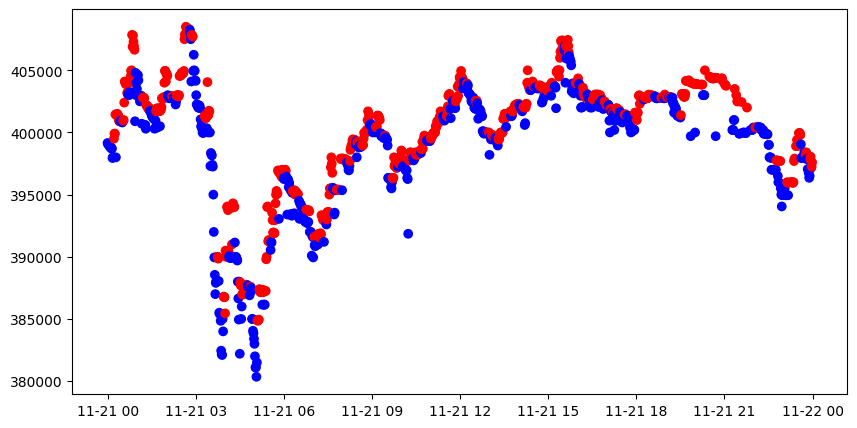

In [6]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
#[[YOUR CODE]]
sub_data = modify_data.loc['2017-11-21', 'close']

# ÏàòÏãù Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
#[[YOUR CODE]]
c_sig = s_momentum_signal.loc['2017-11-21']

# Îëê Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÍµêÎ•º ÏúÑÌïú ÏÉâÏÉÅ Î∞îÍæ∏Í∏∞
#[[YOUR CODE]]
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

# ÏãúÍ∞ÅÌôîÌïòÍ∏∞
#[[YOUR CODE]]
plt.figure(figsize=(10,5))
plt.scatter(sub_data.index, sub_data, c=c_sig['color'])

#### ‚ë¢ Local Min-Max Ï†ÅÏö©ÌïòÍ∏∞

---------------------------------
ÏµúÏÜå - ÏµúÎåÄ Íµ¨Í∞ÑÏùÑ Ïù¥Ïñ¥ÎÇòÍ∞ÄÎ©∞ LabelingÌïòÎäî Ìï®ÏàòÎ•º ÏïÑÎûò ÏàòÎèÑÏΩîÎìú(pseudo-code)Î•º Î≥¥Í≥† ÎßåÎì§Ïñ¥Î¥ÖÏãúÎã§.

‚ë†~‚ë¶ÍπåÏßÄ ÏΩîÎìúÎ•º ÏûêÏÑ∏Ìûà Îì§Ïó¨Îã§Î≥¥Í≥† Ïñ¥Îñ†Ìïú Î∞©ÏãùÏúºÎ°ú ÏΩîÎìúÍ∞Ä ÎèôÏûëÎêòÎäîÏßÄ ÎúØÏñ¥Î¥ÖÏãúÎã§.
‚ëß return Í∞íÏùÄ dictionary ÌòïÌÉúÎ°ú 2Í∞úÏùò DataFrameÏù¥ Î∞òÌôòÎêòÏñ¥ÏïºÌï©ÎãàÎã§.

In [7]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# Local min / max Î•º Ï∂îÏ∂úÌïòÍ∏∞ ÏúÑÌïú Ìï®Ïàò
def get_local_min_max(close, wait=3):
    min_value = close.iloc[0]
    # max_value = #[[YOUR CODE]] # ‚ë†
    max_value = close.iloc[0]
    n_cnt_min, n_cnt_max = 0, 0

    mins, maxes = [], []
    min_idxes, max_idxes = [], []
    b_min_update, b_max_update = False, False

    for idx, val in zip(close.index[1:], close.values[1:]):
        if val < min_value:
            min_value = val
            mins.append(min_value)
            min_idxes.append(idx)
            n_cnt_min = 0
            b_min_update = True
        if val > max_value:
            # max_value = # [[YOUR CODE]] # ‚ë°
            max_value = val
            # [[YOUR CODE]]  # ‚ë¢
            maxes.append(max_value)
            max_idxes.append(idx)
            n_cnt_max = 0
            # b_max_update = # [[YOUR CODE]] # ‚ë£
            b_max_update = True

        if not b_max_update:
            b_min_update = False
            n_cnt_min += 1
            if n_cnt_min >= wait:
                max_value = min_value
                n_cnt_min = 0

        if not b_min_update:
            # b_max_update = # [[YOUR CODE]] # ‚ë§
            b_max_update = False
            # [[YOUR CODE]] # ‚ë•
            n_cnt_max += 1
            if n_cnt_max >= wait:
                #min_value = # [[YOUR CODE]] # ‚ë¶
                min_value = max_value
                n_cnt_max = 0

    # return # [[YOUR CODE]] # ‚ëß
    return pd.DataFrame.from_dict({'min_time': min_idxes, 'local_min': mins}), pd.DataFrame.from_dict({'max_time': max_idxes, 'local_max': maxes})

get_local_min_max Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ return Í∞íÏù¥ 2Í∞úÍ∞Ä ÎÇòÏò§Í≤å Îê©ÎãàÎã§. ÏïÑÎûò Ï£ºÏÑùÏùÑ Ï†úÍ±∞ÌïòÏó¨ minÍ≥º maxesÏùò Í∞íÏù¥ Ïñ¥ÎñªÍ≤å ÎÇòÏò§ÎäîÏßÄ ÌôïÏù∏Ìï¥Î¥ÖÏãúÎã§.

In [8]:
# Local mins, maxesÎ•º ÌôïÏù∏
mins, maxes = get_local_min_max(sub_data, wait=3)

# mins, maxes ÌôïÏù∏
print(mins)
print('--'*20)
print(maxes)

               min_time  local_min
0   2017-11-21 00:01:00     399050
1   2017-11-21 00:03:00     399000
2   2017-11-21 00:04:00     398900
3   2017-11-21 00:05:00     398850
4   2017-11-21 00:06:00     398800
..                  ...        ...
472 2017-11-21 23:48:00     397850
473 2017-11-21 23:50:00     397050
474 2017-11-21 23:52:00     396750
475 2017-11-21 23:53:00     396350
476 2017-11-21 23:59:00     397600

[477 rows x 2 columns]
----------------------------------------
               max_time  local_max
0   2017-11-21 00:13:00     399500
1   2017-11-21 00:14:00     399900
2   2017-11-21 00:16:00     401450
3   2017-11-21 00:19:00     401350
4   2017-11-21 00:20:00     401500
..                  ...        ...
268 2017-11-21 23:41:00     398050
269 2017-11-21 23:43:00     398400
270 2017-11-21 23:46:00     398200
271 2017-11-21 23:47:00     398400
272 2017-11-21 23:56:00     398050

[273 rows x 2 columns]


(376546.5, 412585.0)

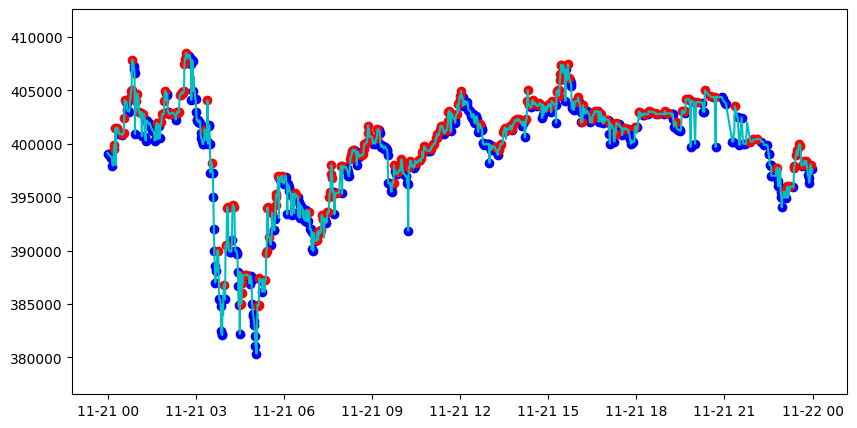

In [9]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# subplots Î∞è plot ÏÉùÏÑ±
# fig, ax = #[[YOUR CODE]]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(sub_data, 'c')

# min_time, local_minÏùÑ ÌôúÏö©Ìïú scatter plot ÏÉùÏÑ±
#[[YOUR CODE]]
ax.scatter(mins.min_time, mins.local_min, c='blue')

# maxes_time, local_maxÎ•º ÌôúÏö©Ìïú scatter plot ÏÉùÏÑ±
#[[YOUR CODE]]
ax.scatter(maxes.max_time, maxes.local_max, c='red')

# yÏ∂ï ÏÑ§Ï†ï
ax.set_ylim([sub_data.min() * 0.99, sub_data.max()  * 1.01])

#### ‚ë£ Trend Scanning Ï†ÅÏö©ÌïòÍ∏∞

------------------------------
Trend ScanningÏùÑ Íµ¨ÌòÑÌï¥Î¥ÖÏãúÎã§.
$$x_{t+1}=\beta_0+\beta_1*1+\epsilon_{t+1}$$
$$t\hat{{_\beta{_1}}}=\frac{\beta_1}{\sigma\beta_1}$$
$$Label\quad i(t)=\left\{\begin{matrix}
1,if \quad max \quad t\hat{{_\beta{_1}}}>0 \\
0, if \quad else \quad\quad\quad\quad
\end{matrix}\right.$$
OLSÎäî ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÌïòÎäî Í≤ΩÏö∞ Ïú†Ïö©ÌïòÍ≤å ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏúºÎ©∞ ÏïÑÎûò Ìï®ÏàòÏóêÏÑú ols.tvalueÎ•º ÌÜµÌï¥ t-valueÍ∞íÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Ìï®ÏàòÎ•º ÌôúÏö©ÌïòÏó¨ Ï∂îÏÑ∏(trend)Î•º Ï∂îÏ†ïÌï©ÎãàÎã§.

In [10]:
def t_val_lin_r(close):
    import statsmodels.api as sml

    # t-value from a linear trend
    x = np.ones((close.shape[0], 2))
    x[:, 1] = np.arange(close.shape[0])
    ols = sml.OLS(close, x).fit()
    return ols.tvalues[1]

In [11]:
look_forward_window = 60
min_sample_length = 5
step = 1
t1_array = []
t_values_array = []

In [12]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# Ïù¥ ÏΩîÎìú Î∏îÎü≠ÏùÄ Ïã§ÌñâÏóê 20-30Î∂ÑÏ†ïÎèÑÍ∞Ä ÏÜåÏöîÎê† Ïàò ÏûàÏäµÎãàÎã§.

molecule = modify_data['2017-11-01':'2017-11-30'].index
label = pd.DataFrame(index=molecule, columns=['t1', 't_val', 'bin'])
tmp_out = []

for ind in tqdm(molecule):
    subset = modify_data.loc[ind:, 'close'].iloc[:look_forward_window]  # Ï†ÑÎ∞© ÌÉêÏÉâÏùÑ ÏúÑÌïú ÏÉòÌîå Ï∂îÏ∂ú
    if look_forward_window > subset.shape[0]:
        continue

    tmp_subset = pd.Series(index=subset.index[min_sample_length-1:subset.shape[0]-1])
    tval = []

    # ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÌÜµÌï¥ t ÌÜµÍ≥ÑÎüâÍ∞íÏùÑ Ïù¥Ïö©ÌïòÏó¨ Ï∂îÏÑ∏ Ï∂îÏ†ï
    for forward_window in np.arange(min_sample_length, subset.shape[0]):
        df = subset.iloc[:forward_window]
        # tval.append("[[YOUR CODE]]")  # t-value ÏÇ¨Ïö©
        tval.append(t_val_lin_r(df.values))

    tmp_subset.loc[tmp_subset.index] = np.array(tval)
    idx_max = tmp_subset.replace([-np.inf, np.inf, np.nan], 0).abs().idxmax()
    tmp_t_val = tmp_subset[idx_max]
    tmp_out.append([tmp_subset.index[-1], tmp_t_val, np.sign(tmp_t_val)])

# label.loc[molecule] = np.array("[[YOUR CODE]]")  # prevent leakage
label.loc[molecule] = np.array(tmp_out)  # prevent leakage

label['t1'] = pd.to_datetime(label['t1'])
label['bin'] = pd.to_numeric(label['bin'], downcast='signed')

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 33384/33384 [17:20<00:00, 32.07it/s]


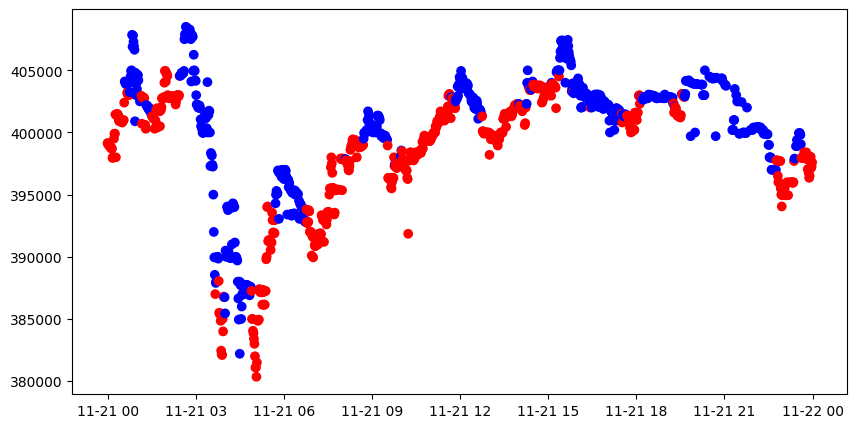

In [13]:
# ÏãúÍ∞ÅÌôî
sub_data = modify_data.loc['2017-11-21', 'close']
c_sig = label['bin'].loc['2017-11-21']
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(sub_data.index, sub_data.values, c=c_sig['color'])

### 2. ÌîÑÎ°úÏ†ùÌä∏ : Feature Engineering

-------------------------------------
‚ë† ÌôòÍ≤ΩÍµ¨ÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞<br>
‚ë° Technical Index Ï†ÅÏö©ÌïòÍ∏∞<br>
‚ë¢ Feature Selection methods Ï†ÅÏö©ÌïòÍ∏∞

-------------------------------------
#### ‚ë† ÌôòÍ≤ΩÍµ¨ÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

-------------------------------------
ÌôòÍ≤ΩÍµ¨ÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏòµÎãàÎã§.

In [14]:
!pip install ta==0.9.0
!pip install shap

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28893 sha256=fa44dcc6708b4d7996a135bb0f58caaf5f185c9ea2ee5a04c2f6e395bbf5b5b8
  Stored in directory: /root/.cache/pip/wheels/b7/65/0e/3d1bb888bc1bd2cdfb6d7f025fd9d0b44ca4873e27f8bb369e
Successfully built ta


In [15]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

import sys
# sys.path.append('/aiffel/aiffel/fnguide/data/')
# sys.path.append('/aiffel/aiffel/08_time_series/fnguide/')
sys.path.append('/content/gdrive/MyDrive/aiffel/08_time_series/fnguide/')

from libs.feature_importance import importance as imp
from sklearn.feature_selection import SequentialFeatureSelector, RFECV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [16]:
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú ÏÑ§Ï†ï
# DATA_PATH = '/aiffel/aiffel/fnguide/data/'
# DATA_PATH = '/aiffel/aiffel/08_time_series/fnguide/'
DATA_PATH = '/content/gdrive/MyDrive/aiffel/08_time_series/fnguide/'
anno_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick_label.pkl')
target_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv')

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_modify_data = pd.read_csv(target_file_name, index_col=0, parse_dates=True)
df_label_data = pd.read_pickle(anno_file_name)
df_sub_modify_data = df_modify_data.loc[df_label_data.index]

# ÌïôÏäµ ÏãúÍ∞Ñ Îã®Ï∂ïÏùÑ ÏúÑÌï¥ Ïó¨Í∏∞ÏÑ† Ìé∏ÏùòÏÉÅ 1000Í∞úÏùò Îç∞Ïù¥ÌÑ∞Îßå Í∞ÄÏ†∏ÏòµÎãàÎã§.
df_sub_modify_data = df_sub_modify_data.iloc[:1000]

### ‚ë° Technical Index Ï†ÅÏö©ÌïòÍ∏∞

---------------------------------------
ÏïûÏÑú Î∞∞Ïö¥ Í∏∞Ïà†Ï†Å ÏßÄÌëúÏôÄ ÏàòÏùµÎ•†/Î≥ÄÎèôÏÑ± ÏßÄÌëúÎ•º Ï∞∏Í≥†ÌïòÏó¨ ÏΩîÎìúÎ•º ÎúØÏñ¥Î¥ÖÏãúÎã§.

In [17]:
# Í∏∞Ïà†Ï†Å ÏßÄÌëúÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§.

mt = 1
fillna = False
df_ = df_sub_modify_data.copy()
open, high, low, close, volume = 'open', 'high', 'low', 'close', 'volume'
cols = [open, high, low, close, volume]

## Volume Index
# Chaikin Money Flow
df_["volume_cmf"] = ta.volume.ChaikinMoneyFlowIndicator(
                        high=df_[high], low=df_[low], close=df_[close], volume=df_[volume], window=20*mt, fillna=fillna
                    ).chaikin_money_flow()
# Force Index
df_["volume_fi"] = ta.volume.ForceIndexIndicator(
                        close=df_[close], volume=df_[volume], window=15*mt, fillna=fillna
                    ).force_index()
# Money Flow Indicator
df_["volume_mfi"] = ta.volume.MFIIndicator(
                        high=df_[high],
                        low=df_[low],
                        close=df_[close],
                        volume=df_[volume],
                        window=15*mt,
                        fillna=fillna,
                    ).money_flow_index()
# Ease of Movement
df_["volume_sma_em"] = ta.volume.EaseOfMovementIndicator(
                            high=df_[high], low=df_[low], volume=df_[volume], window=15*mt, fillna=fillna
                        ).sma_ease_of_movement()

# Volume Price Trend
df_["volume_vpt"] = ta.volume.VolumePriceTrendIndicator(
                        close=df_[close], volume=df_[volume], fillna=fillna
                    ).volume_price_trend()

## volatility index
# Average True Range
df_["volatility_atr"] = ta.volatility.AverageTrueRange(
                            close=df_[close], high=df_[high], low=df_[low], window=10*mt, fillna=fillna
                        ).average_true_range()

# Ulcer Index
df_["volatility_ui"] = ta.volatility.UlcerIndex(
                            close=df_[close], window=15*mt, fillna=fillna
                        ).ulcer_index()

## trend index
# MACD
df_["trend_macd_diff"] = ta.trend.MACD(
                            close=df_[close], window_slow=25*mt, window_fast=10*mt, window_sign=9, fillna=fillna
                        ).macd_diff()

# Average Directional Movement Index (ADX)
df_["trend_adx"] = ta.trend.ADXIndicator(
                        high=df_[high], low=df_[low], close=df_[close], window=15*mt, fillna=fillna
                    ).adx()

# TRIX Indicator
df_["trend_trix"] = ta.trend.TRIXIndicator(
                        close=df_[close], window=15*mt, fillna=fillna
                    ).trix()

# Mass Index
df_["trend_mass_index"] = ta.trend.MassIndex(
                            high=df_[high], low=df_[low], window_fast=10*mt, window_slow=25*mt, fillna=fillna
                        ).mass_index()

# DPO Indicator
df_["trend_dpo"] = ta.trend.DPOIndicator(
                        close=df_[close], window=20*mt, fillna=fillna
                    ).dpo()

# Aroon Indicator
df_["trend_aroon_ind"] = ta.trend.AroonIndicator(close=df_[close], window=20, fillna=fillna).aroon_indicator()

## momentum index
# Relative Strength Index (RSI)
df_["momentum_rsi"] = ta.momentum.RSIIndicator(close=df_[close], window=15*mt, fillna=fillna).rsi()

# Williams R Indicator
df_["momentum_wr"] = ta.momentum.WilliamsRIndicator(
                        high=df_[high], low=df_[low], close=df_[close], lbp=15*mt, fillna=fillna
                    ).williams_r()

In [18]:
# ÏàòÏùµÎ•† / Î≥ÄÎèôÏÑ± ÏßÄÌëúÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§.
windows_mom = [5, 10, 20]
windows_std = [30]

for i in windows_mom:
    df_[f'vol_change_{i}'] = df_.volume.pct_change(i).round(6)
    df_[f'ret_{i}'] = df_.close.pct_change(i).round(6)

for i in windows_std:
    df_[f'std_{i}'] = df_.close.rolling(i).std()
    df_[f'vol_std_{i}'] = df_.volume.rolling(i).std()

In [19]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

df_tmp_data = df_.join(df_label_data).dropna()

# X, y Îç∞Ïù¥ÌÑ∞ÏÖã ÎßåÎì§Í∏∞
X = df_tmp_data.iloc[:, 5:-1]
# y = #[[YOUR CODE]] # iloc[:, -1] ÏÇ¨Ïö©
y = df_tmp_data.iloc[:, -1] # iloc[:, -1] ÏÇ¨Ïö©

# StandardScaler Ï†ÅÏö©
# sc = #[[YOUR CODE]]
sc = StandardScaler()

# fit_transform ÏÇ¨Ïö©
# X_sc = #[[YOUR CODE]]
X_sc = sc.fit_transform(X)

# DataFrame Î≥ÄÌôò
X_sc = pd.DataFrame(X_sc, index=X.index, columns=X.columns)

In [20]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# RandomForest Î™®Îç∏ Ï†ÅÏö©
# rfc = #[[YOUR CODE]]
rfc = RandomForestClassifier(class_weight='balanced')

# RandomForest fit ÌïòÍ∏∞
#[[YOUR CODE]]
rfc.fit(X_sc, y)

RandomForestClassifier(class_weight='balanced')

### ‚ë¢ Feature Selection methods Ï†ÅÏö©ÌïòÍ∏∞

-----------------------------------
**MDI, Mean Decrease Impurity**

In [21]:
# MDI, Mean Decrease Impurity
feat_imp = imp.mean_decrease_impurity(rfc, X.columns)
feat_imp

mean       std
volume_cmf        0.046206  0.002082
volume_fi         0.040939  0.002567
volume_mfi        0.051277  0.002684
volume_sma_em     0.034979  0.001747
volume_vpt        0.025189  0.001358
volatility_atr    0.081490  0.003447
volatility_ui     0.051087  0.002222
trend_macd_diff   0.079411  0.003576
trend_adx         0.055019  0.002407
trend_trix        0.068237  0.002937
trend_mass_index  0.065483  0.002828
trend_dpo         0.023440  0.001331
trend_aroon_ind   0.034461  0.002031
momentum_rsi      0.035629  0.002470
momentum_wr       0.027332  0.001977
vol_change_5      0.016030  0.000930
ret_5             0.031456  0.002198
vol_change_10     0.016449  0.001069
ret_10            0.044519  0.002815
vol_change_20     0.018619  0.001092
ret_20            0.035612  0.002153
std_30            0.052196  0.002672
vol_std_30        0.064938  0.002798

**MDA, Mean Decrease Accuracy**

In [22]:
# MDA, Mean Decrease Accuracy
svc_rbf = SVC(kernel='rbf', probability=True) # Tree Î∞è Support Vector Machine Ïô∏Ïóê Îã§Î•∏ Î∂ÑÎ•òÍ∏∞(classifier)Î•º ÏÇ¨Ïö©Ìï¥Î¥ÖÏãúÎã§.
cv = KFold(n_splits=5) # n_splitsÏùÑ Î≥ÄÍ≤ΩÌï¥Î¥ÖÏãúÎã§.
feat_imp_mda = imp.mean_decrease_accuracy(svc_rbf, X_sc, y, cv_gen=cv)

In [23]:
# plot_feature_importance Ìï®Ïàò ÎßåÎì§Í∏∞
def plot_feature_importance(importance_df, save_fig=False, output_path=None):
    # Plot mean imp bars with std
    plt.figure(figsize=(10, importance_df.shape[0] / 5))
    importance_df.sort_values('mean', ascending=True, inplace=True)
    importance_df['mean'].plot(kind='barh', color='b', alpha=0.25, xerr=importance_df['std'], error_kw={'ecolor': 'r'})
    if save_fig:
        plt.savefig(output_path)
    else:
        plt.show()

plot_feature_importance Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ feat_impÏôÄ feat_imp_mdaÎ•º ÌôïÏù∏Ìï¥Î¥ÖÏãúÎã§.

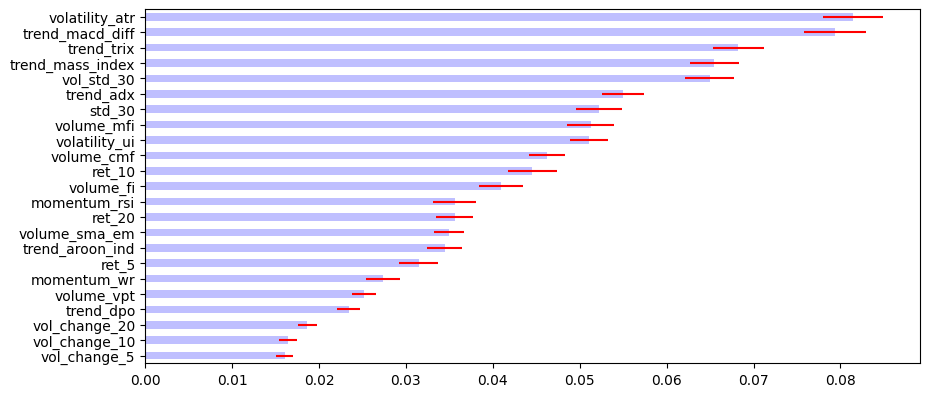

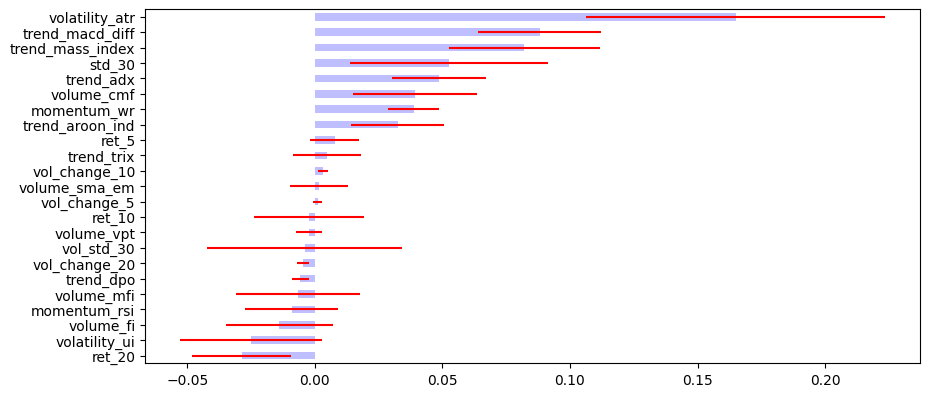

In [24]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# feat_imp ÌôïÏù∏
# plot_feature_importance('[[YOUR CODE]]')
plot_feature_importance(feat_imp)

# feat_imp_mda ÌôïÏù∏
# plot_feature_importance('[[YOUR CODE]]')
plot_feature_importance(feat_imp_mda)

**RFE CV, Recursive Feature Elimination**

In [25]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# RFE CV, Recursive Feature Elimination
svc_rbf = SVC(kernel='linear', probability=True)
# rfe_cv = #[[YOUR CODE]] # RFECV
rfe_cv = RFECV(svc_rbf, cv=cv)
# rfe_fitted = #[[YOUR CODE]] # fit
rfe_fitted = rfe_cv.fit(X_sc, y)

In [26]:
# ÏÑ†ÌÉùÎêú ÌîºÏ≥ê ÌôïÏù∏ÌïòÍ∏∞

# [[Your Code]]
rfe_df = pd.DataFrame([rfe_fitted.support_, rfe_fitted.ranking_], columns=X_sc.columns).T.rename(columns={0:"Optimal_Features", 1:"Ranking"})
rfe_df

Optimal_Features Ranking
volume_cmf                  False      12
volume_fi                   False       4
volume_mfi                  False      14
volume_sma_em               False       7
volume_vpt                  False       8
volatility_atr               True       1
volatility_ui               False      11
trend_macd_diff              True       1
trend_adx                   False      19
trend_trix                  False      10
trend_mass_index            False      13
trend_dpo                   False      16
trend_aroon_ind             False       5
momentum_rsi                False       2
momentum_wr                 False       3
vol_change_5                False      20
ret_5                       False      18
vol_change_10               False      21
ret_10                      False      17
vol_change_20               False      15
ret_20                      False       6
std_30                       True       1
vol_std_30                  False       9

In [27]:
rfe_df[rfe_df["Optimal_Features"]==True]

Optimal_Features Ranking
volatility_atr              True       1
trend_macd_diff             True       1
std_30                      True       1

**SFS, Sequential Feature Selection**

In [28]:
# SFS, Sequential Feature Selection

# n = [Your Code]
n = 2

sfs_forward = SequentialFeatureSelector(svc_rbf, n_features_to_select=n, direction='forward')
sfs_fitted = sfs_forward.fit(X_sc, y)

In [29]:
# ÏÑ†ÌÉùÎêú ÌîºÏ≥ê ÌôïÏù∏ÌïòÍ∏∞

# [[Your Code]]
sfs_rank = sfs_fitted.get_support()
# sfs_df = pd.DataFrame(sfs_rank, index=X_sc.columns, columns={"Optimal_Features"})
sfs_df = pd.DataFrame(sfs_rank, index=X_sc.columns, columns=["Optimal_Features"])
sfs_df [sfs_df ["Optimal_Features"]==True].index

Index(['volume_mfi', 'trend_macd_diff'], dtype='object')

**SHAP, Shapley Additive explanations**

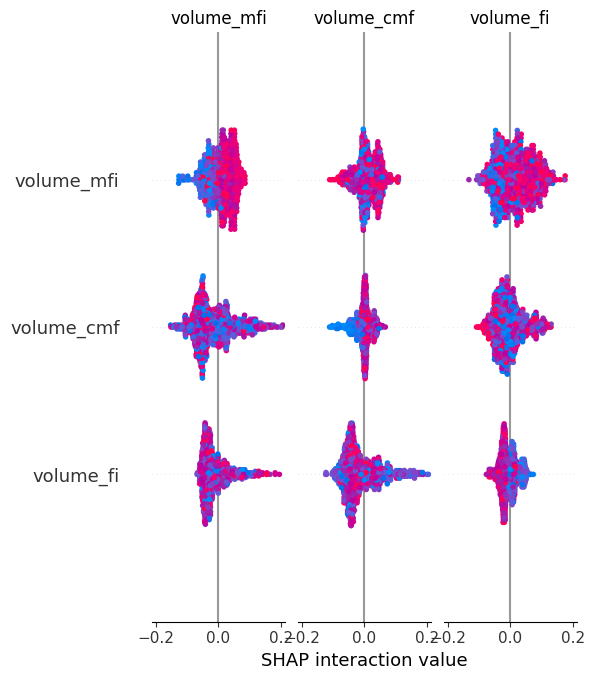

In [30]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# SHAP, Shapley Additive explanations
import shap
explainer = shap.TreeExplainer(rfc)
shap_value = explainer.shap_values(X_sc)

# shap_value, X_sc ÏÇ¨Ïö© shap.summary_plot Í∑∏Î¶¨Í∏∞
#[[YOUR CODE]]
shap.summary_plot(shap_value, X_sc)

### 3. ÌîÑÎ°úÏ†ùÌä∏ : Model Traning

--------------------------------------
**‚ë† ÌôòÍ≤ΩÍµ¨ÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞**<br>
**‚ë° Purged K-fold for Cross-ValidationÏ†ÅÏö©ÌïòÍ∏∞**<br>
**‚ë¢ Model Ï†ÅÏö©ÌïòÍ∏∞**

------------------------------------
#### ‚ë† ÌôòÍ≤ΩÍµ¨ÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

-------------------------------------

In [31]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

# sys.path.append('/aiffel/aiffel/fnguide/data/')
# sys.path.append('/aiffel/aiffel/08_time_series/fnguide/')
sys.path.append('/content/gdrive/MyDrive/aiffel/08_time_series/fnguide/')
from libs.mlutil.pkfold import PKFold

In [32]:
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú ÏÑ§Ï†ï Î∞è pickle ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
# DATA_PATH = '/aiffel/aiffel/fnguide/data/'
# DATA_PATH = '/aiffel/aiffel/08_time_series/fnguide/'
DATA_PATH = '/content/gdrive/MyDrive/aiffel/08_time_series/fnguide/'
data_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_feature_labels.pkl')
df_data = pd.read_pickle(data_file_name)

# Ïó¨Í∏∞ÏÑúÎ∂ÄÌÑ∞ Î™®Îç∏Ïóê Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†úÌôîÎ•º ÏãúÏûëÌï©ÎãàÎã§.
df_data['t_value'].value_counts()

# Îç∞Ïù¥ÌÑ∞ÏÖã ÎπÑÏú® ÎÇòÎàÑÍ∏∞
train_ratio, test_ratio = 0.7, 0.2
n_train = int(np.round(len(df_data) * train_ratio))
n_test = int(np.round(len(df_data) * test_ratio))

X, y = df_data.iloc[:, 5:-1], df_data.iloc[:, -1]

# standardzation
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨
train_x, test_x, train_y, test_y = X_sc[:n_train, :], X_sc[-n_test:, :], y.iloc[:n_train], y.iloc[-n_test:]

train_x = pd.DataFrame(train_x, index=train_y.index, columns=X.columns)
train_y = pd.Series(train_y, index=train_y.index)
test_x = pd.DataFrame(test_x, index=test_y.index, columns=X.columns)
test_y = pd.Series(test_y, index=test_y.index)

# ÌïôÏäµ ÏãúÍ∞Ñ Îã®Ï∂ïÏùÑ ÏúÑÌï¥ Ïó¨Í∏∞ÏÑ† Ìé∏ÏùòÏÉÅ 1000Í∞úÏùò Îç∞Ïù¥ÌÑ∞Îßå Í∞ÄÏ†∏ÏòµÎãàÎã§.
train_x = train_x[:1000] # Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï¶ùÍ∞Ä ÌòπÏùÄ Í∞êÏÜåÏãúÏºú Í≤∞Í≥ºÎ•º ÎπÑÍµêÌï¥Î¥ÖÏãúÎã§.
train_y = train_y[:1000]

#### ‚ë° Purged K-fold for Cross-ValidationÏ†ÅÏö©ÌïòÍ∏∞

------------------------------------------------------

In [33]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# n_cv = #[[YOUR CODE]] # ÏïûÏóêÏÑú ÏßÄÏ†ïÌïú Í∞íÏùÄ 4ÏûÖÎãàÎã§. ÏñºÎßàÎ•º ÎÑ£ÏùÑÏßÄ ÏÉùÍ∞ÅÌï¥Î≥¥Í≥† Ïôú Ïù¥ Í∞íÏùÑ ÎÑ£ÏóàÎäîÏßÄÏóê ÎåÄÌï¥ÏÑú ÏÑ§Î™ÖÌï¥Î¥ÖÏãúÎã§.
n_cv = 4
t1 = pd.Series(train_y.index.values, index=train_y.index)

# purged K-Fold
# cv = #[[YOUR CODE]]
cv = PKFold(n_cv, t1, 0)

‚ë¢ Model Ï†ÅÏö©ÌïòÍ∏∞

------------------

In [34]:
# GridsearchCVÏóêÏÑú ÏÇ¨Ïö©Ìï† ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ïÌï©ÎãàÎã§. ÌååÎùºÎØ∏ÌÑ∞Í∞íÏùÑ Î∞îÍøîÎ≥¥ÏÑ∏Ïöî
# bc_params = {'n_estimators': [5, 10, 20],
#              'max_features': [0.5, 0.7],
#              'base_estimator__max_depth': [3,5,10,20],
#              'base_estimator__max_features': [None, 'auto'],
#              'base_estimator__min_samples_leaf': [3, 5, 10],
#              'bootstrap_features': [False, True]
#             }
bc_params = {
    'n_estimators': [5, 10, 20],
    'max_features': [0.5, 0.7],
    'estimator__max_depth': [3, 5, 10, 20],  # base_estimator ‚Üí estimator
    'estimator__max_features': [None, 'auto'],  # base_estimator ‚Üí estimator
    'estimator__min_samples_leaf': [3, 5, 10],  # base_estimator ‚Üí estimator
    'bootstrap_features': [False, True]
}

In [35]:
# RandomForest ÏÇ¨Ïö©
rfc = RandomForestClassifier(class_weight='balanced')

In [36]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# Bagging Ï†ÅÏö©
# bag_rfc = #[[YOUR CODE]]
bag_rfc = BaggingClassifier(rfc)

In [37]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# GridSearchCV Ï†ÅÏö©
# gs_rfc = #[[YOUR CODE]]
gs_rfc = GridSearchCV(bag_rfc, bc_params, cv=cv, n_jobs=-1, verbose=1)

In [38]:
# fit
gs_rfc.fit(train_x, train_y)

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


GridSearchCV(cv=PKFold(n_splits=4, pct_embargo=0,
    samples_info_sets=time
2018-01-01 00:43:00   2018-01-01 00:43:00
2018-01-01 00:44:00   2018-01-01 00:44:00
2018-01-01 00:45:00   2018-01-01 00:45:00
2018-01-01 00:46:00   2018-01-01 00:46:00
2018-01-01 00:47:00   2018-01-01 00:47:00
                              ...
2018-01-01 11:48:00   201...0   2018-01-01 11:51:00
2018-01-01 11:52:00   2018-01-01 11:52:00
Length: 670, dtype: datetime64[ns]),
             estimator=BaggingClassifier(estimator=RandomForestClassifier(class_weight='balanced')),
             n_jobs=-1,
             param_grid={'bootstrap_features': [False, True],
                         'estimator__max_depth': [3, 5, 10, 20],
                         'estimator__max_features': [None, 'auto'],
                         'estimator__min_samples_leaf': [3, 5, 10],
                         'max_features': [0.5, 0.7],
                         'n_estimators': [5, 10, 20]},
             verbose=1)

In [39]:
# best estimator
gs_rfc_best = gs_rfc.best_estimator_
gs_rfc_best.fit(train_x, train_y)

BaggingClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                   max_depth=20,
                                                   max_features=None,
                                                   min_samples_leaf=10),
                  max_features=0.7, n_estimators=5)

In [40]:
# ÏòàÏ∏°Í∞í ÌôïÏù∏
pred_y = gs_rfc_best.predict(test_x)
prob_y = gs_rfc_best.predict_proba(test_x)

In [41]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# test_y, pred_yÎ•º ÌôúÏö©Ìïú ÏßÄÌëú Ï†ÅÏö©
# confusion = #[[YOUR CODE]]
# accuracy  = #[[YOUR CODE]]
# precision = #[[YOUR CODE]]
# recall    = #[[YOUR CODE]]
confusion = confusion_matrix(test_y, pred_y)
accuracy  = accuracy_score(test_y, pred_y)
# precision = precision_score(test_y, pred_y)
# recall    = recall_score(test_y, pred_y)
precision = precision_score(test_y, pred_y, average='weighted')
recall    = recall_score(test_y, pred_y, average='weighted')

# ÏßÄÌëúÎ•º ÌÜµÌïú Í≤∞Í≥º ÌôïÏù∏
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'Ï†ïÌôïÎèÑ:{accuracy}, Ï†ïÎ∞ÄÎèÑ:{precision}, Ïû¨ÌòÑÏú®:{recall}')

================= confusion matrix ====================
[[38 14 27]
 [12 16 29]
 [ 0 10 45]]
Ï†ïÌôïÎèÑ:0.518324607329843, Ï†ïÎ∞ÄÎèÑ:0.5620154476180603, Ïû¨ÌòÑÏú®:0.518324607329843


In [42]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# ROC curve ÎßåÎì§Í∏∞
# fpr, tpr, thresholds = #[[YOUR CODE]]
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
auc = roc_auc_score(test_y, pred_y)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc}')

ValueError: multiclass format is not supported

**Ìï¥Í≤∞ Î∞©Î≤ï: Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î¨∏Ï†úÏóêÏÑúÎäî Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ROC Í≥°ÏÑ†ÏùÑ Í∞úÎ≥ÑÏ†ÅÏúºÎ°ú Í≥ÑÏÇ∞**

**1. One-vs-Rest Î∞©Ïãù**
Í∞Å ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌï¥ Ïù¥ÏßÑÌôîÎêú Î™©Ìëú Í∞íÏùÑ ÎßåÎì§Ïñ¥ ROC Í≥°ÏÑ†ÏùÑ Í≥ÑÏÇ∞

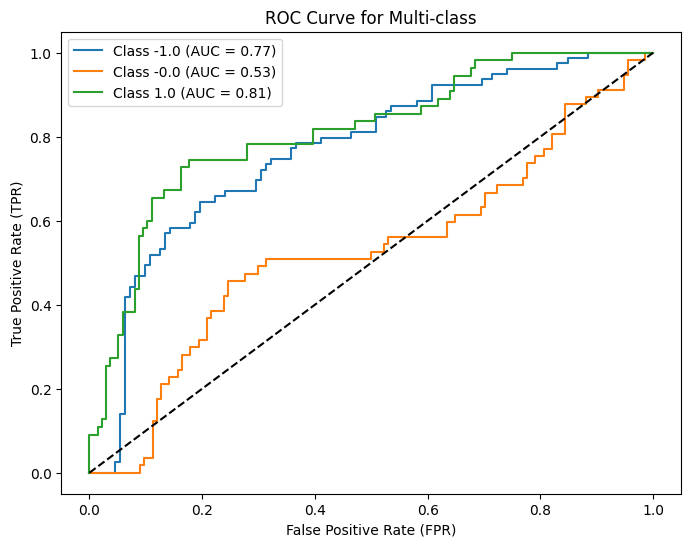

In [46]:
# Îã§Ï§ë ÌÅ¥ÎûòÏä§ Ïù¥ÏßÑÌôî (Ïòà: [0, 1, 2]Î•º Ïõê-Ìï´ Ïù∏ÏΩîÎî©)
classes = sorted(set(test_y))
test_y_bin = label_binarize(test_y, classes=classes)
pred_y_prob = gs_rfc_best.predict_proba(test_x)  # Î™®Îç∏ ÏòàÏ∏° ÌôïÎ•†

# Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ROC Curve
plt.figure(figsize=(8, 6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(test_y_bin[:, i], pred_y_prob[:, i])
    auc = roc_auc_score(test_y_bin[:, i], pred_y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc:.2f})')

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞
plt.plot([0, 1], [0, 1], 'k--')  # ÎåÄÍ∞ÅÏÑ† Í∏∞Ï§ÄÏÑ†
plt.title('ROC Curve for Multi-class')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='best')
plt.show()

**2. Macro ÎòêÎäî Micro-averaging**
Î™®Îì† ÌÅ¥ÎûòÏä§Ïùò ROC Í≥°ÏÑ†ÏùÑ ÌèâÍ∑†ÎÇ¥Îäî Î∞©Î≤ï

In [47]:
from sklearn.metrics import roc_auc_score

# macro ÌèâÍ∑† AUC
macro_auc = roc_auc_score(test_y_bin, pred_y_prob, average='macro', multi_class='ovr')
print(f'Macro-Averaged AUC: {macro_auc:.2f}')

# micro ÌèâÍ∑† AUC
micro_auc = roc_auc_score(test_y_bin, pred_y_prob, average='micro', multi_class='ovr')
print(f'Micro-Averaged AUC: {micro_auc:.2f}')

Macro-Averaged AUC: 0.70
Micro-Averaged AUC: 0.67
